# Title: 

### Author: Cera Drake
### Date: 03/30/2025
#### Objective: 

##### Section 1: Import and Inspect the Data

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

#### Section 2: Data Exploration and Preparation

#### 2.1 Handle Missing Values and Clean Data
#### Impute missing values for age using the median:

In [38]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

C:\Users\cerad\AppData\Local\Temp\ipykernel_2356\3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


#### 2.1 Fill in missing values for embark_town using the mode:

In [39]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\cerad\AppData\Local\Temp\ipykernel_2356\3403561138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


#### 2.2 Feature Engineering
##### Create new features:

###### Add family_size - number of family members on board
###### Convert categorical "sex" to numeric
###### Convert categorical "embarked" to numeric
###### Binary feature - convert "alone" to numeric

In [40]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

#### Section 3. Feature Selection and Justification

#### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 

-First:
input features: alone
target: survived

-Second:
input features - age (or another variable of your choice)
target: survived

-Third:
input features -  age and family_size (or another combination of your choice)
target: survived
 

#### 3.2 Define X (features) and y (target)
-Assign input features to X a pandas DataFrame with 1 or more input features

-Assign target variable to y (as applicable) - a pandas Series with a single target feature

-Again - use comments to run a single case at a time

-The follow starts with only the statements needed for case 1. 

Double brackets [[ ]]]  makes a 2D DataFrame
Single brackets [ ]  make a 1D Series

In [41]:
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only (or your choice)
X = titanic[['age']]
y = titanic['survived']

# Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]
y = titanic['survived']

##### Reflection 3:

Why are these features selected? To see if they had an impact on who was saved/prioritized. Children/Families vs. older
Are there features that are likely to be highly predictive of survival? Yes, sex and class are some other features that likely impacted survival 

#### Section 4. Train a Classification Model (Decision Tree)

#### 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


#### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 4.3 Predict and Evaluate Model Performance
Evaluate model performance on training data

In [44]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [45]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



#### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix:

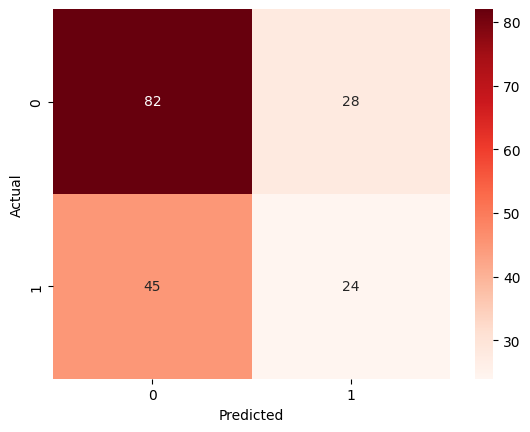

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  